In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
import platform

if platform.system() == 'Linux':
  from google.colab import drive
  drive.mount('/content/drive')

In [3]:
if platform.system() == 'Linux':
  df = pd.read_csv('/content/drive/MyDrive/deep learning/courses/pytorch_course/PYTORCH_NOTEBOOKS/PYTORCH_NOTEBOOKS/Data/TimeSeriesData/Alcohol_Sales.csv', index_col=0, parse_dates=True)
else:
  df = pd.read_csv('../../PYTORCH_NOTEBOOKS/PYTORCH_NOTEBOOKS/Data/TimeSeriesData/Alcohol_Sales.csv', index_col=0, parse_dates=True)



In [4]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [5]:
df.columns[0]

'S4248SM144NCEN'

In [6]:
len(df)

325

In [7]:
df = df.dropna()
len(df)

325

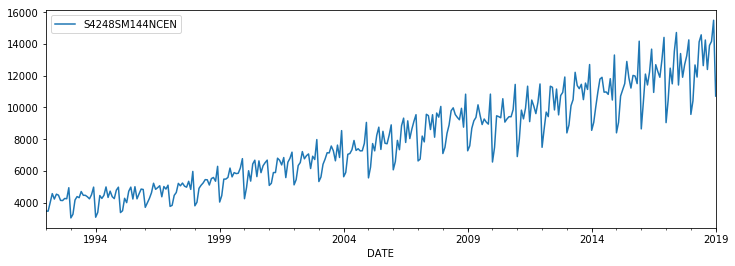

In [8]:
df.plot(figsize=(12, 4))

Transform all the values of the dataset from strings to floats

In [9]:
y = df['S4248SM144NCEN'].values.astype(float)
y

array([ 3459.,  3458.,  4002.,  4564.,  4221.,  4529.,  4466.,  4137.,
        4126.,  4259.,  4240.,  4936.,  3031.,  3261.,  4160.,  4377.,
        4307.,  4696.,  4458.,  4457.,  4364.,  4236.,  4500.,  4974.,
        3075.,  3377.,  4443.,  4261.,  4460.,  4985.,  4324.,  4719.,
        4374.,  4248.,  4784.,  4971.,  3370.,  3484.,  4269.,  3994.,
        4715.,  4974.,  4223.,  5000.,  4235.,  4554.,  4851.,  4826.,
        3699.,  3983.,  4262.,  4619.,  5219.,  4836.,  4941.,  5062.,
        4365.,  5012.,  4850.,  5097.,  3758.,  3825.,  4454.,  4635.,
        5210.,  5057.,  5231.,  5034.,  4970.,  5342.,  4831.,  5965.,
        3796.,  4019.,  4898.,  5090.,  5237.,  5447.,  5435.,  5107.,
        5515.,  5583.,  5346.,  6286.,  4032.,  4435.,  5479.,  5483.,
        5587.,  6176.,  5621.,  5889.,  5828.,  5849.,  6180.,  6771.,
        4243.,  4952.,  6008.,  5353.,  6435.,  6673.,  5636.,  6630.,
        5887.,  6322.,  6520.,  6678.,  5082.,  5216.,  5893.,  5894.,
      

In [10]:
test_size = 12
train_set = y[:-test_size]
test_set = y[-test_size:]

### Normalize all the data with sklearn

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))

Pick the mininum and maxinum values of the train set

We don't also use the test because in that case we were leakin information to the neural network. It has two parts:

1. The **fit** that takes the min and max values
2. The **transform** is the one who changes all the values

It can be do it in one step with **fit_transform()**

In [12]:
scaler.fit(train_set.reshape(-1, 1))

MinMaxScaler(copy=True, feature_range=(-1, 1))

In [13]:
train_norm = scaler.transform(train_set.reshape(-1, 1))

In [14]:
train_norm

array([[-0.92683135],
       [-0.92700231],
       [-0.83400291],
       [-0.73792632],
       [-0.79656381],
       [-0.74390974],
       [-0.75467989],
       [-0.81092401],
       [-0.81280451],
       [-0.79006753],
       [-0.79331567],
       [-0.67433114],
       [-1.        ],
       [-0.9606804 ],
       [-0.80699205],
       [-0.76989486],
       [-0.7818617 ],
       [-0.71536029],
       [-0.75604753],
       [-0.75621848],
       [-0.77211727],
       [-0.79399949],
       [-0.74886742],
       [-0.66783486],
       [-0.99247799],
       [-0.94084965],
       [-0.75861185],
       [-0.78972562],
       [-0.75570562],
       [-0.66595436],
       [-0.77895547],
       [-0.71142833],
       [-0.77040773],
       [-0.79194803],
       [-0.70031627],
       [-0.66834772],
       [-0.94204633],
       [-0.92255748],
       [-0.78835798],
       [-0.83537054],
       [-0.71211215],
       [-0.66783486],
       [-0.7962219 ],
       [-0.66339003],
       [-0.79417044],
       [-0

### Prepare the data for the LSTM cells

In [15]:
# len(y) - test_size - window_size

In [16]:
train_norm = torch.FloatTensor(train_norm).view(-1)
train_norm

tensor([-0.9268, -0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109,
        -0.8128, -0.7901, -0.7933, -0.6743, -1.0000, -0.9607, -0.8070, -0.7699,
        -0.7819, -0.7154, -0.7560, -0.7562, -0.7721, -0.7940, -0.7489, -0.6678,
        -0.9925, -0.9408, -0.7586, -0.7897, -0.7557, -0.6660, -0.7790, -0.7114,
        -0.7704, -0.7919, -0.7003, -0.6683, -0.9420, -0.9226, -0.7884, -0.8354,
        -0.7121, -0.6678, -0.7962, -0.6634, -0.7942, -0.7396, -0.6889, -0.6931,
        -0.8858, -0.8373, -0.7896, -0.7285, -0.6260, -0.6914, -0.6735, -0.6528,
        -0.7719, -0.6613, -0.6890, -0.6468, -0.8757, -0.8643, -0.7567, -0.7258,
        -0.6275, -0.6536, -0.6239, -0.6576, -0.6685, -0.6049, -0.6923, -0.4984,
        -0.8692, -0.8311, -0.6808, -0.6480, -0.6229, -0.5870, -0.5890, -0.6451,
        -0.5753, -0.5637, -0.6042, -0.4435, -0.8289, -0.7600, -0.5815, -0.5808,
        -0.5630, -0.4623, -0.5572, -0.5114, -0.5218, -0.5182, -0.4617, -0.3606,
        -0.7928, -0.6716, -0.4911, -0.60

In [17]:
window_size = 12

In [18]:
def input_data(seq, ws):
    out = []
    L = len(seq)

    for i in range(L-ws):
        window = seq[i:i+ws]
        target = seq[i+ws:i+ws+1]
        out.append((window, target))
    return out

In [19]:
train_data = input_data(train_norm, window_size)

In [20]:
len(train_data)

301

### Define the LSTM model
The hidden size it corresponds to these three values

(*Number of layers*,                           *Batch size*,                  *Hidden size*)

the number of layers of the lstm model | the size of the batches | the number of neurons that we have

1 | 1 | 100

In [21]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=100, out_size=1):
        super().__init__()
        self.hidden_size = hidden_size

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size)
        # we need to condense the output of the neurons to 1 single output
        self.linear = nn.Linear(hidden_size, out_size)
        # (H, C)
        self.hidden = (torch.zeros(1, 1, hidden_size), torch.zeros(1, 1, hidden_size)) # initialize the hidden state

    def forward(self, seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq), 1, -1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq), -1))

        return pred[-1]

In [22]:
torch.manual_seed(101)
model = LSTM()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [23]:
model

LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

In [24]:
import time

start_time = time.time()

epochs = 100
future = 40
losses = []

for i in range(epochs):
    for seq, y_train in train_data:
        optimizer.zero_grad()
        
        model.hidden = (torch.zeros(1, 1, model.hidden_size), torch.zeros(1, 1, model.hidden_size))
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)

        loss.backward()
        optimizer.step()


    losses.append(loss)
    print(f'Epoch: {i} Loss: {loss}')

final_time = time.time() - start_time
print(f'The train took {final_time/60} seconds')

Epoch: 0 Loss: 0.2531020939350128
Epoch: 1 Loss: 0.3753201365470886
Epoch: 2 Loss: 0.39027199149131775
Epoch: 3 Loss: 0.34934696555137634
Epoch: 4 Loss: 0.33085644245147705
Epoch: 5 Loss: 0.33229973912239075
Epoch: 6 Loss: 0.3267035484313965
Epoch: 7 Loss: 0.32074129581451416
Epoch: 8 Loss: 0.3065353333950043
Epoch: 9 Loss: 0.29518038034439087


In [ ]:
# save of colab
if platform.system() == 'Linux':
  torch.save(model.state_dict(), '/content/drive/MyDrive/deep learning/courses/pytorch_course/my files/rnr/AlcoholSales.pt')
else:
  torch.save(model.state_dict(), 'AlcoholSales.pt')

In [ ]:
model = LSTM()

# load the model
if platform.system() == 'Linux':
  model.load_state_dict(torch.load('/content/drive/MyDrive/deep learning/courses/pytorch_course/my files/rnr/AlcoholSales.pt'))
else:
  model.load_state_dict(torch.load('AlcoholSales.pt'))


In [ ]:
plt.plot(range(epochs), losses)

#### Make the test predictions

In [ ]:
future = 12
preds = train_norm[-window_size:].tolist()
model.eval()

for i in range(future):
    seq = torch.FloatTensor(preds[-window_size:])

    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_size), torch.zeros(1, 1, model.hidden_size))
        preds.append(model(seq))


In [ ]:
preds[window_size:]

#### Invert the normalization

In [ ]:
true_predictions = scaler.inverse_transform(np.array(preds).reshape(-1, 1))
true_predictions

In [ ]:
x = np.arange('2018-02-01', '2019-02-01', dtype='datetime64[M]').astype('datetime64[D]')
print(x)

plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'])
plt.plot(x,true_predictions[window_size:])
plt.show()

NameError: name 'np' is not defined

### Zoom it

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
fig.autofmt_xdate()
plt.plot(df['S4248SM144NCEN']['2017-01-01':])
plt.plot(x,true_predictions[window_size:])
plt.show()

### Train with all the data


In [ ]:
epochs = 100
model.train()

y_norm = scaler.fit_transform(y.reshape(-1, 1))
y_norm = torch.FloatTensor(y_norm).view(-1)
all_data = input_data(y_norm, window_size)

losses = []

import time
start_time = time.time()

for i in range(epochs):
    for seq, y_train in all_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1, 1, model.hidden_size), torch.zeros(1, 1, model.hidden_size))

        y_pred = model(seq)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    losses.append(loss)
    print(f'Epoch: {i} Loss: {loss}')

total_time = time.time() - start_time
print(f'The training took {total_time/60} seconds')

Epoch: 0 Loss: 0.019849883392453194
Epoch: 1 Loss: 0.016895776614546776
Epoch: 2 Loss: 0.013914728537201881
Epoch: 3 Loss: 0.010082521475851536
Epoch: 4 Loss: 0.00924087967723608
Epoch: 5 Loss: 0.00837179459631443
Epoch: 6 Loss: 0.006645703222602606
Epoch: 7 Loss: 0.0042010825127363205
Epoch: 8 Loss: 0.0009260622318834066
Epoch: 9 Loss: 0.0021264362148940563
Epoch: 10 Loss: 0.002625483786687255
Epoch: 11 Loss: 0.0016882972558960319
Epoch: 12 Loss: 0.0013432740233838558
Epoch: 13 Loss: 0.0065227290615439415
Epoch: 14 Loss: 0.007257234305143356
Epoch: 15 Loss: 0.00014413651661016047
Epoch: 16 Loss: 0.00012574784341268241
Epoch: 17 Loss: 0.00019763599266298115
Epoch: 18 Loss: 0.0012758697848767042
Epoch: 19 Loss: 0.0006966633955016732
Epoch: 20 Loss: 0.0026531657204031944
Epoch: 21 Loss: 0.001579827512614429
Epoch: 22 Loss: 0.0011596442200243473
Epoch: 23 Loss: 0.00015179114416241646
Epoch: 24 Loss: 0.0014380313223227859
Epoch: 25 Loss: 0.0011685352073982358
Epoch: 26 Loss: 0.000386628526

In [ ]:
# save of colab
if platform.system() == 'Linux':
  torch.save(model.state_dict(), '/content/drive/MyDrive/deep learning/courses/pytorch_course/my files/rnr/AlcoholSales_Full.pt')
else:
  torch.save(model.state_dict(), 'AlcoholSales_Full.pt')

In [ ]:
model = LSTM()

# load the model
if platform.system() == 'Linux':
  model.load_state_dict(torch.load('/content/drive/MyDrive/deep learning/courses/pytorch_course/my files/rnr/AlcoholSales_Full.pt'))
else:
  model.load_state_dict(torch.load('AlcoholSales_Full.pt'))


####Forecast into the future values


In [ ]:
window_size = 12
future = 12
L = len(y)

preds = y_norm[-window_size:].tolist()
model.eval()

for i in range(future):
  seq = torch.FloatTensor(preds[-window_size:])
  
  with torch.no_grad():
    model.hidden = (torch.zeros(1, 1, model.hidden_size), torch.zeros(1, 1, model.hidden_size))
    preds.append(model(seq).item())


In [ ]:
true_predictions = scaler.inverse_transform(np.array(preds).reshape(-1, 1))
true_predictions

array([[10415.00001808],
       [12683.00013363],
       [11919.00006013],
       [14137.99993426],
       [14583.00009555],
       [12640.00017402],
       [14257.00005591],
       [12395.9999277 ],
       [13913.99994579],
       [14173.99995232],
       [15504.        ],
       [10717.99998423],
       [10922.52431086],
       [12478.51009858],
       [12402.73334289],
       [14488.93896168],
       [14692.41047198],
       [13468.3987062 ],
       [14856.87322718],
       [13071.36511379],
       [14551.19461524],
       [15377.42116195],
       [16575.65384287],
       [12503.6342051 ]])

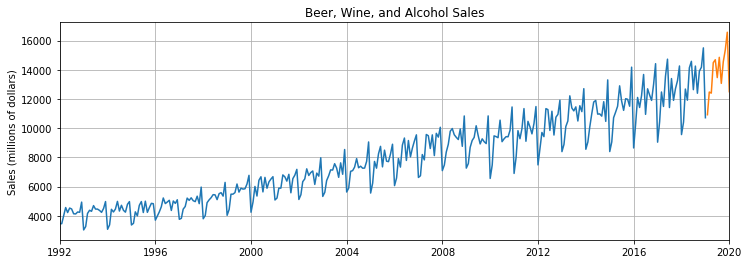

In [ ]:
x = np.arange('2019-02-01', '2020-02-01', dtype='datetime64[M]').astype('datetime64[D]')

plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'])
plt.plot(x,true_predictions[window_size:])
plt.show()